In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("restaurent.csv")
df.head()

,food,decor,service,price
0,18.0,22.0,17.0,41.0
1,24.0,22.0,22.0,54.0
2,18.0,17.0,14.0,32.0
3,18.0,9.0,13.0,20.0
4,21.0,12.0,16.0,25.0


price : the price of typical meal <br>
food : the swiggy rating for the quality of food <br>
service: the swiggy rating for the quality of service <br>
decor: The Swiggy rating for the quality of decor

In [4]:
df.astype

<bound method NDFrame.astype of      food  decor  service  price
0    18.0   22.0     17.0   41.0
1    24.0   22.0     22.0   54.0
2    18.0   17.0     14.0   32.0
3    18.0    9.0     13.0   20.0
4    21.0   12.0     16.0   25.0
..    ...    ...      ...    ...
109  20.0   21.0     18.0   40.0
110  18.0   14.0     16.0   30.0
111  17.0   17.0     18.0   34.0
112  20.0   22.0     21.0   51.0
113  19.0   14.0     15.0   23.0

[114 rows x 4 columns]>

In [5]:
df.describe()

,food,decor,service,price
count,114.000000,114.000000,114.000000,114.000000
mean,19.605263,16.578947,17.771930,33.315789
std,2.536873,4.464005,2.847247,11.115895
min,14.000000,2.000000,10.000000,11.000000
25%,18.000000,14.000000,16.000000,25.000000
50%,20.000000,16.500000,18.000000,32.500000
75%,21.000000,20.000000,20.000000,41.000000
max,27.000000,28.000000,26.000000,65.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   food     114 non-null    float64
 1   decor    114 non-null    float64
 2   service  114 non-null    float64
 3   price    114 non-null    float64
dtypes: float64(4)
memory usage: 3.7 KB


Observation: There are no null entries

## Randomly selecting 50 Elements

In [7]:
df50 =df.sample(n=50)
df50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 15 to 47
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   food     50 non-null     float64
 1   decor    50 non-null     float64
 2   service  50 non-null     float64
 3   price    50 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [8]:
df50.describe()

,food,decor,service,price
count,50.000000,50.000000,50.000000,50.000000
mean,19.620000,16.580000,17.900000,33.180000
std,2.355107,4.025886,2.689739,10.777319
min,16.000000,7.000000,12.000000,15.000000
25%,18.000000,14.000000,16.000000,25.000000
50%,19.500000,16.000000,18.000000,32.000000
75%,21.000000,19.000000,20.000000,40.750000
max,26.000000,27.000000,26.000000,65.000000


# Question (a)
Plot price vs. each of the three independent variables. Does it seem like 
y (price) is related to the x’s (food, service, and decor)?

Text(0.5, 1.0, 'food vs price')

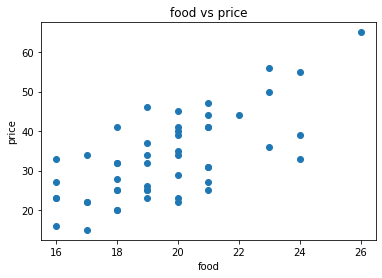

In [9]:
plt.scatter(df50['food'], df50['price'])
plt.xlabel('food') 
plt.ylabel('price')
plt.title("food vs price")

Text(0.5, 1.0, 'decor vs price')

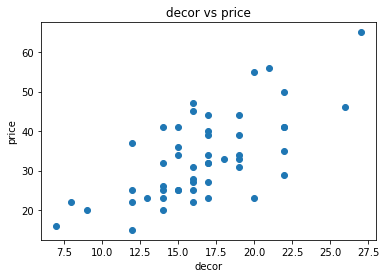

In [10]:
plt.scatter(df50['decor'],df50['price'])
plt.xlabel('decor') 
plt.ylabel('price') 
plt.title("decor vs price")

Text(0.5, 1.0, 'service vs price')

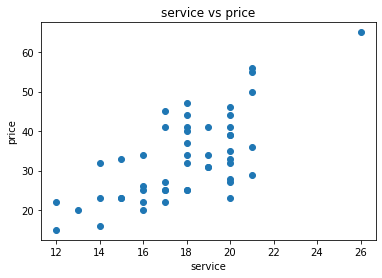

In [11]:
plt.scatter(df50['service'],df50['price'])
plt.xlabel('service') 
plt.ylabel('price') 
plt.title('service vs price')

## Observation
Yes, It seems like price is related to x's (food, service and decor). 

In [12]:
X = df50[["food", "decor", "service"]].to_numpy()
Y = df50["price"].to_numpy()
X.shape, Y.shape

((50, 3), (50,))

## Model Building : Linear Regression 

In [13]:
class GradientDescentLR:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.parameters = None
        self.cost_history = []
        self.mu = None
        self.sigma = None
    
    def calculate_cost(self):
        """
        Returns the cost and gradients.
        parameters: None
        
        Returns:
            cost : Caculated loss (scalar).
            gradients: array containing the gradients w.r.t each parameter

        """

        m = self.X.shape[0]

        y_hat = np.dot(self.X, self.parameters)
        y_hat = y_hat.reshape(-1)
        error = y_hat - self.Y

        cost = np.dot(error.T, error)/(2*m)

        gradients = np.zeros(self.X.shape[1])

        for i in range(self.X.shape[1]):
            gradients[i] = np.mean(error * self.X[:,i])

        return cost, gradients
    def init_parameters(self):
        """
        Initialize the parameters as array of 0s
        parameters: None
        
        Returns:None

        """
        self.parameters = np.zeros((self.X.shape[1],1))


    def feature_normalize(self, X):
        """
        Normalize the samples.
        parameters: 
            X : input/feature matrix
        
        Returns:
            X_norm : Normalized X.

        """
        X_norm = X.copy()
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)

        self.mu = mu
        self.sigma = sigma

        for n in range(X.shape[1]):
            X_norm[:,n] = (X_norm[:,n] - mu[n]) / sigma[n]
        return X_norm
    def fit(self, x, y, learning_rate=0.01, epochs=500, is_normalize=True, verbose=0):
        """
        Iterates and find the optimal parameters for input dataset
        parameters: 
            x : input/feature matrix
            y : target matrix
            learning_rate: between 0 and 1 (default is 0.01)
            epochs: number of iterations (default is 500)
            is_normalize: boolean, for normalizing features (default is True)
            verbose: iterations after to print cost
        
        Returns:
            parameters : Array of optimal value of weights.

        """
        self.X = x
        self.Y = y
        self.cost_history = []
        if self.X.ndim == 1: # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1,1)
            is_normalize = False
        if is_normalize:
            self.X = self.feature_normalize(self.X)
        self.X = np.concatenate([np.ones((self.X.shape[0],1)), self.X], axis=1)
        self.init_parameters()

        for i in range(epochs):
            cost, gradients = self.calculate_cost()
            self.cost_history.append(cost)
            self.parameters -= learning_rate * gradients.reshape(-1,1)

            if verbose:
                if not (i % verbose):
                    print(f"Cost after {i} epochs: {cost}")

        return self.parameters
    
    def predict(self,x, is_normalize=True):
        """
        Returns the predictions after fitting.
        parameters: 
            x : input/feature matrix
        
        Returns:
            predictions : Array of predicted target values.

        """
        x = np.array(x, dtype=np.float64) # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1,-1)
        if is_normalize:
            for n in range(x.shape[1]):
                x[:,n] = (x[:,n] - self.mu[n]) / self.sigma[n]
        x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
        return np.dot(x,self.parameters)
        

In [14]:
model = GradientDescentLR()
parameters=model.fit(x=X, y=Y, learning_rate=0.01, epochs=400)
pred_y = model.predict(X).reshape(-1)

 y = b + w1X1 + w2X2 + w3X3 <br>
X1 = food <br>
X2 = decor <br>
X3 = service 

In [15]:
parameters

array([[32.58440064],
       [ 4.23946188],
       [ 3.6947644 ],
       [ 2.17155033]])

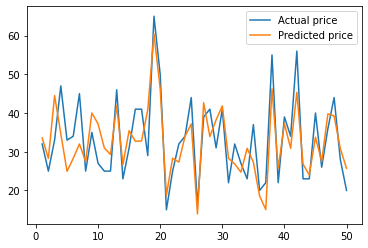

In [17]:
index=np.arange(1,51)
plt.plot(index,Y,label="Actual price")
plt.plot(index,pred_y, label="Predicted price")
plt.legend()
plt.show()

In [18]:
error= Y-pred_y
MSE=sum((error*error)/50)
MSE

39.153024238092755

## (b)
 Suppose a restaurant has food = 125, service=148, and decor=265. Run 
the regression of price on food, decor, and service and give the 95% 
predictive interval for the price of a meal.

In [19]:
price_pred=model.predict([[125,265,148]]).reshape(-1)
price_pred

array([560.611041])

In [20]:
sum_errs = sum((Y-pred_y)*(Y-pred_y))
stdev = np.sqrt(1/(len(Y)-2) * sum_errs)
z=1.96
stdev

6.386266534369928

For 95% prediction interval we use z=1.96   

In [21]:
interval = z*stdev
lower, upper = price_pred - interval, price_pred + interval
print("95% prediction Interval: (",end="")
print(lower[0],",",upper[0],")")

95% prediction Interval: (548.0939585959604 , 573.1281234106905 )


# Question (c)
 What is the interpretation of the coefficient estimate for the explanatory 
variable food in the multiple regression from part (b)?

Ans: Coefficient estimate for the explanatory variable food in the multiple regression model is equal to w1 = 4.23946188. This is highest among the parameters w1, w2, w3. We can interpretate that the contribution of food in the price is more than service and decor. 

## Question (d)
Suppose you were to regress price on the one variable food in a simple 
linear regression? What would be the interpretation of the slope? Plot food 
vs. service. Is there a relationship? Does it make sense? What is your
prediction for how the estimated coefficient for the variable food in the 
regression of price on food will compare to the estimated coefficient for food 
in the regression of price on food, service, and decor? Run the simple linear 
regression of price on food and see if you are right! Why are
the coefficients different in the two regressions?


### Interpretation of slope in simple linear regression:
Slope will represent the weightage of food in the price calculation. 

### Plot food vs service

Text(0.5, 1.0, 'food vs service')

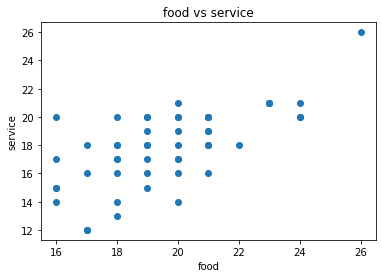

In [28]:
plt.scatter(df50['food'], df50['service'])
plt.xlabel('food') 
plt.ylabel('service')
plt.title("food vs service")

### Relationship in food vs service
It can be observed that for the same food quality rating there are multiple services available. It does make sense of having differnt types of service for the same food rating. 

## My Prediction:
The slope of simple linear regression in one variable food is the weightage of food in the price and this should be higher than that of the weightage of food in price obtained in the calculation of price with all the variable.

In [29]:
X1 = df50[["food"]].to_numpy()
Y1 = df50["price"].to_numpy()
X1.shape, Y1.shape

((50, 1), (50,))

In [30]:
model1 = GradientDescentLR()
parameters1=model.fit(x=X1, y=Y1, learning_rate=0.01, epochs=400)
pred_y1 = model.predict(X1).reshape(-1)

In [31]:
parameters1

array([[32.58440064],
       [ 7.315928  ]])

### Yes, My prediction is absolutely correct. It is very obvious too. 

In [32]:
print("Coefficent in simple regression: ",parameters1[1][0])
print("Coefficent in multiple linear regression: ",parameters[1][0])

Coefficent in simple regression:  7.315928002109274
Coefficent in multiple linear regression:  4.239461878589377


# Question (e)
Suppose I asked you to use the multiple regression results to predict the 
price of a meal at a restaurant with food = 20, service = 3, and decor =17. 
How would you feel about it?


Ans: This is pretty straight forward. feels easy. I will just use predict the price directly with the help of model that I have built. 

In [35]:
model = GradientDescentLR()
parameters=model.fit(x=X, y=Y, learning_rate=0.01, epochs=400)
pred_y = model.predict(X).reshape(-1)
price=model.predict([[20,17,3]])
price

array([[21.51316956]])

Seems very reasonable prediction